In [1]:
!pip install google-cloud-aiplatform

In [2]:
import vertexai
vertexai.init()

In [3]:
from vertexai.language_models import TextEmbeddingModel
embedding_model = TextEmbeddingModel.from_pretrained('text-embedding-004')

In [4]:
embedding = embedding_model.get_embeddings(['life'])

In [11]:
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[-0.010603697039186954, -0.015785258263349533, -0.010502871125936508, 0.002185781253501773, -0.07148707658052444, 0.04219384118914604, -0.010504273697733879, 0.03097270429134369, 0.03328254073858261, 0.05283762887120247]


In [17]:
embedding = embedding_model.get_embeddings(['What is the meaning of life?'])
vector = embedding[0].values
print(f"Length = {len(vector)}")

Length = 768


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

emb_1 = embedding_model.get_embeddings(['What is the meaning of life?'])
emb_2 = embedding_model.get_embeddings(['How does one spend their time well on Earth?'])
emb_3 = embedding_model.get_embeddings(['Would you like a salad?'])

vec_1 = [emb_1[0].values]
vec_2 = [emb_2[0].values]
vec_3 = [emb_3[0].values]

print(cosine_similarity(vec_1,vec_2)) 
print(cosine_similarity(vec_2,vec_3))
print(cosine_similarity(vec_1,vec_3))

[[0.6042384]]
[[0.3396287]]
[[0.36034201]]


In [36]:
in_1 = "Missing flamingo discovered at swimming pool"
in_2 = "Sea otter spotted on surfboard by beach"
in_3 = "Baby panda enjoys boat ride"
in_4 = "Breakfast themed food truck beloved by all!"
in_5 = "New curry restaurant aims to please!"
in_6 = "Python developers are wonderful people"
in_7 = "TypeScript, C++ or Java? All are great!" 

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]


In [38]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings(
        [input_text])[0].values
    embeddings.append(emb)

In [41]:
import numpy as np
embeddings_array = np.array(embeddings)
print("Shape: "+ str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[ 0.02803496 -0.00299724 -0.01659381 ... -0.01121059 -0.00519713
  -0.02044056]
 [ 0.00485451  0.03049659 -0.01399871 ... -0.01616582 -0.03072107
   0.01834136]
 [ 0.03935665 -0.03734451 -0.06938332 ... -0.02096844 -0.01913369
   0.02881981]
 ...
 [ 0.00716709 -0.05124414  0.01775808 ...  0.00892509 -0.00407107
   0.00254001]
 [ 0.03583142 -0.05428725  0.00165318 ... -0.01935553  0.04669554
   0.02359349]
 [ 0.05533755 -0.0237293  -0.03609464 ... -0.03040388  0.02278006
   0.01252656]]


In [42]:
from sklearn.decomposition import PCA 

#Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

[[ 0.49533001  0.17530328]
 [ 0.47394037  0.16537099]
 [ 0.34864739  0.11626409]
 [-0.01331229 -0.5433861 ]
 [-0.22950727 -0.56127286]
 [-0.4674816   0.36944202]
 [-0.60761662  0.27827859]]


In [43]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.49533001  0.17530328]
 [ 0.47394037  0.16537099]
 [ 0.34864739  0.11626409]
 [-0.01331229 -0.5433861 ]
 [-0.22950727 -0.56127286]
 [-0.4674816   0.36944202]
 [-0.60761662  0.27827859]]


In [45]:
!pip install ipympl plot-utils matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 80.9 MB/s eta 0:00:00


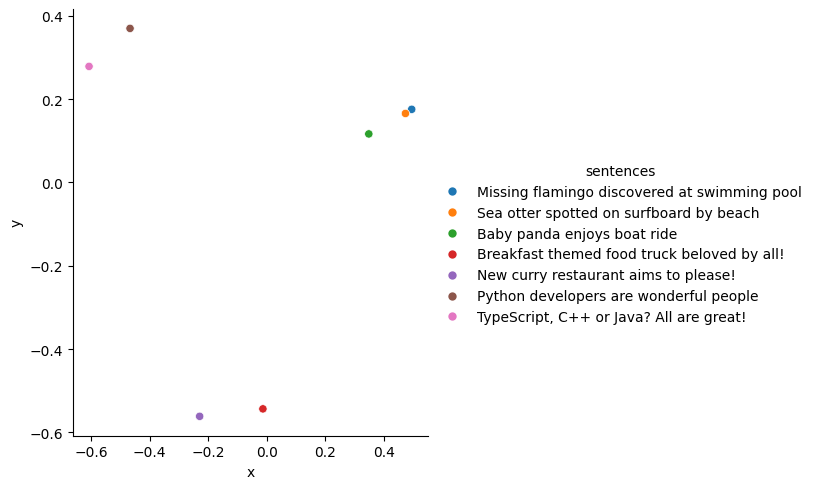

In [54]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({'x': new_values[:,0], 'y': new_values[:,1], 'sentences': input_text_lst_news})

#Create a visualization
sns.relplot(
    data,
    x='x',
    y='y',
    kind='scatter',
    hue='sentences'
)